<a href="https://colab.research.google.com/github/rbrunou/controleInvestimentos/blob/master/Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output 

In [ ]:
pip install yfinance

In [ ]:
# pip list
# pip install openpyxl
# pip install dataframe_image
# pip install yfinance
# pip install seaborn
# pip install ipython
import yfinance as yf
import pandas as pd
import json
from datetime import date, datetime
import numpy as np
from datetime import timedelta
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [ ]:
pd.options.display.max_rows = None

In [ ]:
#Importa dados da planilha de planilha_investido e usa a data como index
planilha_investido = pd.read_excel('/content/drive/MyDrive/Gráficos Investimentos/Dados.xlsx', index_col = 0)
clear_output()
planilha_investido.tail()

,Ativo,Tipo,Quantidade,Valor,Total Investido,Racional 01,Racional 02,Racional 03
Data,,,,,,,,
2022-01-07,BTC,CRIPTO,0.003064,239845.968084,734.9600,NaN,NaN,NaN
2022-01-22,BTC,CRIPTO,0.005244,191141.030000,1002.4200,Compras periódicas na queda do BTC,"Tomar cuidado com essas compras, fiquei sem re...",NaN
2022-02-05,NUBANK,RF,1721.990000,1.000000,1721.9900,Reserva para emergências,Caixa para comprar quedas,Aumetar urgentemente esse valor assim que houv...
2022-03-08,USDBRL,USDBRL,106.960000,5.158003,551.7000,Dólar barato em comparação com períodos anteri...,"Moeda forte, a Rússia está em guerra com a Ucr...",NaN
2022-03-07,TESOUROIPCA,RF,0.230000,3000.960000,690.2208,IPCA+2026 (pós fixado),"IPCA + 5,66%",NaN


In [ ]:
#Separo os dias que houveram 1 ou mais planilha_investido
dias_de_aporte = planilha_investido.index.unique()

#Gera um conjunto de datas do primeiro dia que foi feito investimento, até hoje
dti = pd.bdate_range(dias_de_aporte[0], date.today(), freq="D")

In [ ]:
#Gerar um dataframe e armazena no dia o 
#aporte total feito
investido = round(pd.DataFrame(planilha_investido.groupby(['Data'])['Total Investido'].sum()),2)
investido.head()

,Total Investido
Data,
2018-11-29,988.53
2018-12-04,1967.01
2018-12-07,1968.47
2018-12-14,6072.76
2019-01-02,3311.40


In [ ]:
#Verifica se houve investimento, se houver, soma com o anterior, senão repete o investido do dia anterior
investido['Investido'] = investido.cumsum()

In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Cria um dataframe com todos os dias desde o primeiro investimento
#Separa os ativos investidos pela coluna de tipos. Isso é necessário por conta da forma
#que é escrito o ticket no yahoo finance
#Todos os ativos são concatenados para a requisição no yahoo
cotacoes_importadas_yahoo = pd.DataFrame(index = dti)
ativos_para_baixar = ''
RVN = planilha_investido.loc[planilha_investido['Tipo'] == 'RV-N'].Ativo.unique()
for i in range(len(RVN)):
    ativos_para_baixar = ativos_para_baixar + RVN[i] + '.SA' + ','
    
RVI = planilha_investido.loc[planilha_investido['Tipo'] == 'RV-I'].Ativo.unique()
for i in range(len(RVI)):
    ativos_para_baixar = ativos_para_baixar + RVI[i] + ','
    
CRIPTO = planilha_investido.loc[planilha_investido['Tipo'] == 'CRIPTO'].Ativo.unique()
for i in range(len(CRIPTO)):
    ativos_para_baixar = ativos_para_baixar + CRIPTO[i] + '-USD' + ','
    
ativos_para_baixar = ativos_para_baixar + 'BRL=X,' + '^BVSP,' + '^GSPC'
ativos_para_baixar

'BCFF11.SA,BOVA11.SA,ITSA4.SA,HGLG11.SA,VISC11.SA,BRCR11.SA,KNRI11.SA,ITUB4.SA,EGIE3.SA,IVVB11.SA,WEGE3.SA,COGN3.SA,IAU,SLV,USO,XOM,BTC-USD,ETH-USD,COTI-USD,DOT-USD,ADA-USD,BRL=X,^BVSP,^GSPC'

In [ ]:
RVN

array(['BCFF11', 'BOVA11', 'ITSA4', 'HGLG11', 'VISC11', 'BRCR11',
       'KNRI11', 'ITUB4', 'EGIE3', 'IVVB11', 'WEGE3', 'COGN3'],
      dtype=object)

In [ ]:
#Baixando cotações do yahoo finance
print("Baixando Cotações")
cotacoes_importadas_yahoo = yf.download(ativos_para_baixar, start=dias_de_aporte[0])[['Adj Close']]
cotacoes_importadas_yahoo = cotacoes_importadas_yahoo.loc[:, 'Adj Close']

Baixando Cotações
[*********************100%***********************]  24 of 24 completed


In [ ]:
cotacoes_importadas_yahoo.tail()

,ADA-USD,BCFF11.SA,BOVA11.SA,BRCR11.SA,BRL=X,BTC-USD,COGN3.SA,COTI-USD,DOT-USD,EGIE3.SA,...,ITUB4.SA,IVVB11.SA,KNRI11.SA,SLV,USO,VISC11.SA,WEGE3.SA,XOM,^BVSP,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-06,0.823752,NaN,NaN,NaN,NaN,38419.984375,NaN,0.197348,16.978825,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,0.797379,NaN,107.110001,68.000000,5.06056,38062.039062,2.05,0.199888,16.431496,39.119999,...,24.139999,234.0,131.250000,23.700001,82.370003,98.750000,31.080000,87.120003,111593.00000,4201.089844
2022-03-08,0.801250,NaN,NaN,67.260002,5.11050,38737.269531,2.14,0.200456,16.953651,39.099998,...,24.110001,NaN,130.300003,24.450001,85.430000,98.629997,31.740000,87.779999,111203.00000,4170.700195
2022-03-09,NaN,66.5,109.779999,67.180000,NaN,NaN,2.20,NaN,NaN,39.889999,...,25.100000,234.0,130.300003,23.799999,75.470001,97.099998,32.669998,82.790001,113900.34375,4277.879883
2022-03-10,0.849355,NaN,NaN,NaN,NaN,41965.937500,NaN,0.211707,17.864971,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Transferindo os dados importados para outro dataframe com identificações legíveis
#Para ativos cotados em dólar, faz-se uma multiplicação pela cotação do dólar
cotacoes_importadas = pd.DataFrame(index = dti)
for i in range(len(RVN)):
    cotacoes_importadas[RVN[i]] = cotacoes_importadas_yahoo.loc[:, RVN[i] + '.SA']

cotacoes_importadas['USDBRL'] = cotacoes_importadas_yahoo.loc[:, 'BRL=X'] 
    
for i in range(len(RVI)):
    cotacoes_importadas[RVI[i]] = cotacoes_importadas_yahoo.loc[:, RVI[i]] * cotacoes_importadas_yahoo.loc[:, 'BRL=X'] 
    
for i in range(len(CRIPTO)):
    cotacoes_importadas[CRIPTO[i]] = cotacoes_importadas_yahoo.loc[:, CRIPTO[i] + '-USD'] * cotacoes_importadas_yahoo.loc[:, 'BRL=X'] 

cotacoes_importadas['ACRIABRL'] = planilha_investido.loc[planilha_investido['Ativo'] == 'ACRIABRL']["Valor"]

In [ ]:
cotacoes_importadas.tail()

,BCFF11,BOVA11,ITSA4,HGLG11,VISC11,BRCR11,KNRI11,ITUB4,EGIE3,IVVB11,...,IAU,SLV,USO,XOM,BTC,ETH,COTI,DOT,ADA,ACRIABRL
2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,NaN,107.110001,9.55,162.800003,98.750000,68.000000,131.250000,24.139999,39.119999,234.0,...,192.048264,119.935281,416.838360,440.876021,192615.241017,12640.121793,1.011545,83.152573,4.035185,NaN
2022-03-08,NaN,NaN,9.51,161.479996,98.629997,67.260002,130.300003,24.110001,39.099998,NaN,...,199.207282,124.951725,436.590005,448.599671,197966.810472,13168.468035,1.024430,86.641633,4.094788,NaN
2022-03-09,66.5,109.779999,10.04,161.500000,97.099998,67.180000,130.300003,25.100000,39.889999,234.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Inserindo colunas com dados de renda fixa
cotacoes_importadas['TESOUROIPCA'] = planilha_investido.loc[planilha_investido['Ativo'] == 'TESOUROIPCA']["Valor"]
cotacoes_importadas['TESOUROSELIC'] = planilha_investido.loc[planilha_investido['Ativo'] == 'TESOUROSELIC']["Valor"]

cotacoes_importadas['CDBIPCA'] = np.ones(len(cotacoes_importadas.index))
cotacoes_importadas['NUBANK'] = np.ones(len(cotacoes_importadas.index))

In [ ]:
#Tratando os dados.
#Primeiro preenche os dados vazios com os valores anteriores
#Depois preenche os valores que persistirem vazios com 0
cotacoes_importadas.fillna(method='ffill', inplace=True)
cotacoes_importadas.fillna(0, inplace=True)

In [ ]:
cotacoes_importadas.tail()

,BCFF11,BOVA11,ITSA4,HGLG11,VISC11,BRCR11,KNRI11,ITUB4,EGIE3,IVVB11,...,BTC,ETH,COTI,DOT,ADA,ACRIABRL,TESOUROIPCA,TESOUROSELIC,CDBIPCA,NUBANK
2022-03-06,78.910004,110.400002,9.87,164.119995,99.720001,69.019997,131.970001,24.670000,39.470001,239.100006,...,196897.379412,13166.650154,1.053556,84.303194,4.240490,0.36,2921.23,10512.32,1.0,1.0
2022-03-07,78.910004,107.110001,9.55,162.800003,98.750000,68.000000,131.250000,24.139999,39.119999,234.000000,...,192615.241017,12640.121793,1.011545,83.152573,4.035185,0.36,3000.96,10512.32,1.0,1.0
2022-03-08,78.910004,107.110001,9.51,161.479996,98.629997,67.260002,130.300003,24.110001,39.099998,234.000000,...,197966.810472,13168.468035,1.024430,86.641633,4.094788,0.36,3000.96,10512.32,1.0,1.0
2022-03-09,66.500000,109.779999,10.04,161.500000,97.099998,67.180000,130.300003,25.100000,39.889999,234.000000,...,197966.810472,13168.468035,1.024430,86.641633,4.094788,0.36,3000.96,10512.32,1.0,1.0
2022-03-10,66.500000,109.779999,10.04,161.500000,97.099998,67.180000,130.300003,25.100000,39.889999,234.000000,...,197966.810472,13168.468035,1.024430,86.641633,4.094788,0.36,3000.96,10512.32,1.0,1.0


In [ ]:
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Armazena no array todos os ativos da planilha_investido
investido_ativos = pd.DataFrame(index = dti)
aportado = planilha_investido.Ativo.unique()
aportado

array(['TESOUROIPCA', 'TESOUROSELIC', 'BCFF11', 'CDBIPCA', 'BOVA11',
       'ITSA4', 'HGLG11', 'VISC11', 'BRCR11', 'KNRI11', 'ITUB4', 'EGIE3',
       'IVVB11', 'WEGE3', 'BTC', 'ETH', 'IAU', 'NUBANK', 'SLV', 'COGN3',
       'USO', 'USDBRL', 'XOM', 'ACRIABRL', 'COTI', 'DOT', 'ADA'],
      dtype=object)

In [ ]:
#Armazena o valor investido diariamente em colunas separadas no dataframe
for i in range(len(aportado)):
    investido_ativos[aportado[i]] = planilha_investido.loc[planilha_investido.Ativo == aportado[i]]["Total Investido"]
investido_ativos.tail()

,TESOUROIPCA,TESOUROSELIC,BCFF11,CDBIPCA,BOVA11,ITSA4,HGLG11,VISC11,BRCR11,KNRI11,...,NUBANK,SLV,COGN3,USO,USDBRL,XOM,ACRIABRL,COTI,DOT,ADA
2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,690.2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,551.7,NaN,NaN,NaN,NaN,NaN
2022-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Substitui os valores 'nan' com zeros
investido_ativos.fillna(0, inplace=True)
investido_ativos.tail()

,TESOUROIPCA,TESOUROSELIC,BCFF11,CDBIPCA,BOVA11,ITSA4,HGLG11,VISC11,BRCR11,KNRI11,...,NUBANK,SLV,COGN3,USO,USDBRL,XOM,ACRIABRL,COTI,DOT,ADA
2022-03-06,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-07,690.2208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-08,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,551.7,0.0,0.0,0.0,0.0,0.0
2022-03-09,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-10,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Faz uma soma de valores nas linhas de forma acumulativa
investido_ativos = investido_ativos.cumsum()
investido_ativos.tail()

,TESOUROIPCA,TESOUROSELIC,BCFF11,CDBIPCA,BOVA11,ITSA4,HGLG11,VISC11,BRCR11,KNRI11,...,NUBANK,SLV,COGN3,USO,USDBRL,XOM,ACRIABRL,COTI,DOT,ADA
2022-03-06,-219.1100,11.27,135.1,5000.0,58.3,411.95,-90.68,305.76,2399.86,2196.96,...,1721.99,6757.71,-432.0,1709.31,7037.35,2116.4,4453.37,6472.31,5722.31,4869.04
2022-03-07,471.1108,11.27,135.1,5000.0,58.3,411.95,-90.68,305.76,2399.86,2196.96,...,1721.99,6757.71,-432.0,1709.31,7037.35,2116.4,4453.37,6472.31,5722.31,4869.04
2022-03-08,471.1108,11.27,135.1,5000.0,58.3,411.95,-90.68,305.76,2399.86,2196.96,...,1721.99,6757.71,-432.0,1709.31,7589.05,2116.4,4453.37,6472.31,5722.31,4869.04
2022-03-09,471.1108,11.27,135.1,5000.0,58.3,411.95,-90.68,305.76,2399.86,2196.96,...,1721.99,6757.71,-432.0,1709.31,7589.05,2116.4,4453.37,6472.31,5722.31,4869.04
2022-03-10,471.1108,11.27,135.1,5000.0,58.3,411.95,-90.68,305.76,2399.86,2196.96,...,1721.99,6757.71,-432.0,1709.31,7589.05,2116.4,4453.37,6472.31,5722.31,4869.04


In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Verifica quais ativos existem aporte, e posiciona o valor do aporte no dia e coluna do 
#dataframe quantidade_ativos
quantidade_ativos = pd.DataFrame(index = dti)
for i in range(len(aportado)):
    quantidade_ativos[aportado[i]] = planilha_investido.loc[planilha_investido.Ativo == aportado[i]]["Quantidade"]

#Substitui os valores 'nan' com zeros
quantidade_ativos.fillna(0, inplace=True)
#Faz uma soma de valores nas linhas de forma acumulativa
quantidade_ativos = quantidade_ativos.cumsum()
quantidade_ativos.tail()

,TESOUROIPCA,TESOUROSELIC,BCFF11,CDBIPCA,BOVA11,ITSA4,HGLG11,VISC11,BRCR11,KNRI11,...,NUBANK,SLV,COGN3,USO,USDBRL,XOM,ACRIABRL,COTI,DOT,ADA
2022-03-06,-1.110223e-16,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,30.0,14.0,...,1721.99,72.4602,0.0,0.0,1231.58,9.5538,12398.77378,2845.0,24.5,410.0
2022-03-07,2.300000e-01,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,30.0,14.0,...,1721.99,72.4602,0.0,0.0,1231.58,9.5538,12398.77378,2845.0,24.5,410.0
2022-03-08,2.300000e-01,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,30.0,14.0,...,1721.99,72.4602,0.0,0.0,1338.54,9.5538,12398.77378,2845.0,24.5,410.0
2022-03-09,2.300000e-01,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,30.0,14.0,...,1721.99,72.4602,0.0,0.0,1338.54,9.5538,12398.77378,2845.0,24.5,410.0
2022-03-10,2.300000e-01,0.0,0.0,5000.0,0.0,0.0,0.0,0.0,30.0,14.0,...,1721.99,72.4602,0.0,0.0,1338.54,9.5538,12398.77378,2845.0,24.5,410.0


In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#A carteira consolidada será o produto da cotação com a quantidade de ativos que foram comprados.
carteira_consolidada = pd.DataFrame(index = dti)
carteira_consolidada = quantidade_ativos * cotacoes_importadas
carteira_consolidada.tail()

,ACRIABRL,ADA,BCFF11,BOVA11,BRCR11,BTC,CDBIPCA,COGN3,COTI,DOT,...,KNRI11,NUBANK,SLV,TESOUROIPCA,TESOUROSELIC,USDBRL,USO,VISC11,WEGE3,XOM
2022-03-06,4463.558561,1738.601034,0.0,0.0,2070.599899,83803.618174,5000.0,0.0,2997.366785,2065.428258,...,1847.580017,1721.99,8617.725857,-3.243217e-13,0.0,6195.955824,0.0,0.0,0.0,4041.719448
2022-03-07,4463.558561,1654.425661,0.0,0.0,2040.000000,81981.051048,5000.0,0.0,2877.846356,2037.238049,...,1837.500000,1721.99,8690.534465,6.902208e+02,0.0,6232.484764,0.0,0.0,0.0,4212.041328
2022-03-08,4463.558561,1678.863045,0.0,0.0,2017.800064,84258.790267,5000.0,0.0,2914.504278,2122.720014,...,1824.200043,1721.99,9054.027016,6.902208e+02,0.0,6840.608481,0.0,0.0,0.0,4285.831540
2022-03-09,4463.558561,1678.863045,0.0,0.0,2015.400009,84258.790267,5000.0,0.0,2914.504278,2122.720014,...,1824.200043,1721.99,9054.027016,6.902208e+02,0.0,6840.608481,0.0,0.0,0.0,4285.831540
2022-03-10,4463.558561,1678.863045,0.0,0.0,2015.400009,84258.790267,5000.0,0.0,2914.504278,2122.720014,...,1824.200043,1721.99,9054.027016,6.902208e+02,0.0,6840.608481,0.0,0.0,0.0,4285.831540


In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Cria um dataframe separado para armazenar a compilação dos dados da carteira, como o total, o 
#valor investido
compilacao = pd.DataFrame(index = dti)
compilacao.index.names = ['Data']
compilacao = pd.merge(compilacao, investido, on=["Data"], how="outer")
compilacao['Total Investido'].fillna(0, inplace=True)
compilacao.Investido.fillna(method='ffill', inplace=True)
compilacao['Total'] = round(carteira_consolidada.sum(axis=1),2)
compilacao['Lucro %'] = round(((compilacao['Total'] / compilacao['Investido'])-1)*100,2)

compilacao.tail()

,Total Investido,Investido,Total,Lucro %
Data,,,,
2022-03-06,0.00,91758.06,151881.53,65.52
2022-03-07,690.22,92448.28,150924.15,63.25
2022-03-08,551.70,92999.98,155261.20,66.95
2022-03-09,0.00,92999.98,155360.92,67.05
2022-03-10,0.00,92999.98,155360.92,67.05


In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Cria um dataframe com o nome indices, para comparar os índices:
#IBOV, SP500, IPCA, IGPM e CDI
#Primeiro apenas copia os dados do IBOV e do SP500 importados do yahoo 
indices = pd.DataFrame(index = dti)
indices['IBOV']   =     cotacoes_importadas_yahoo.loc[:, '^BVSP']
indices['SP500']   =    cotacoes_importadas_yahoo.loc[:, '^GSPC']
indices.fillna(method='ffill', inplace=True)

#Para importar indicadores do banco central, foi criada a função consulta_bc
# https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

#Importa os indicadores do banco central
print("")
print("Importando dados Banco Central")
try:
  indices['IPCA'] = consulta_bc(433)
  indices['IGPM'] = consulta_bc(189)
  indices['CDI'] = consulta_bc(12)
  #Substitui todos os dados NAN para 0
  indices.fillna(0, inplace=True)
  print(indices.tail())
except:
  print("API Banco central não respondeu")




Importando dados Banco Central
                    IBOV        SP500  IPCA  IGPM       CDI
Data                                                       
2022-03-06  114474.00000  4328.870117   0.0   0.0  0.000000
2022-03-07  111593.00000  4201.089844   0.0   0.0  0.040168
2022-03-08  111203.00000  4170.700195   0.0   0.0  0.040168
2022-03-09  113900.34375  4277.879883   0.0   0.0  0.000000
2022-03-10  113900.34375  4277.879883   0.0   0.0  0.000000


In [ ]:
try:
  #Cria um dataframe com os índices importados, de tal forma que consigamos analisálos de forma
  #acumulada desde o primeiro investimento feito.
  indices_acumulados = pd.DataFrame(index = dti)

  #Calcula a porcentagem acumulada do IBOV
  #(indices[0]['IBOV']*indices[1]['IBOV']*indices[n]['IBOV']-1)
  #pct_change -> retorna a diferença percentual entre o dado atual e o anterior
  #cumprod -> realiza a multiplicação acumulada entre os dados da coluna especificada
  indices_acumulados['IBOV'] = round(((1+(indices['IBOV'].pct_change())).cumprod()-1)*100,2)
  indices_acumulados.iloc[0]=0

  indices_acumulados['SP500'] = round(((1+(indices['SP500'].pct_change())).cumprod()-1)*100,2)
  indices_acumulados.iloc[0]=0

  #Nos indicadores abaixo, o retorno do banco central já é em porcentagem, enquanto o SP500 e o 
  #IBOV é em pontos
  indices_acumulados['IPCA'] = round(((1+(indices['IPCA']/100)).cumprod()-1)*100,2)
  indices_acumulados.iloc[0]=0

  indices_acumulados['IGPM'] = round(((1+(indices['IGPM']/100)).cumprod()-1)*100,2)
  indices_acumulados.iloc[0]=0

  indices_acumulados['CDI'] = round(((1+(indices['CDI']/100)).cumprod()-1)*100,2)
  indices_acumulados.iloc[0]=0

  #Apenas copia os dados do dataframe compilação
  indices_acumulados['Carteira'] = compilacao['Lucro %']

  print(indices_acumulados.tail())
except:
  print("API Banco central não respondeu")

             IBOV  SP500   IPCA   IGPM    CDI  Carteira
Data                                                   
2022-03-06  27.60  58.11  20.82  59.65  16.16     65.52
2022-03-07  24.39  53.45  20.82  59.65  16.21     63.25
2022-03-08  23.96  52.34  20.82  59.65  16.26     66.95
2022-03-09  26.97  56.25  20.82  59.65  16.26     67.05
2022-03-10  26.97  56.25  20.82  59.65  16.26     67.05


In [ ]:
try:
  #gera um dataframe com os valores dos índices hoje para comparação diária
  indices_acumulados_hoje = pd.DataFrame(index = ['IBOV', 'SP500', 'IPCA', 'IGPM', 'CDI', 'Carteira'], columns =['Resultado %'])
  indices_acumulados_hoje.loc['IBOV']['Resultado %'] = indices_acumulados.iloc[indices_acumulados.shape[0]-1]['IBOV']
  indices_acumulados_hoje.loc['SP500']['Resultado %'] = indices_acumulados.iloc[indices_acumulados.shape[0]-1]['SP500']
  indices_acumulados_hoje.loc['IPCA']['Resultado %'] = indices_acumulados.iloc[indices_acumulados.shape[0]-1]['IPCA']
  indices_acumulados_hoje.loc['IGPM']['Resultado %'] = indices_acumulados.iloc[indices_acumulados.shape[0]-1]['IGPM']
  indices_acumulados_hoje.loc['CDI']['Resultado %'] = indices_acumulados.iloc[indices_acumulados.shape[0]-1]['CDI']
  indices_acumulados_hoje.loc['Carteira']['Resultado %'] = indices_acumulados.iloc[indices_acumulados.shape[0]-1]['Carteira']

  indices_acumulados_hoje.sort_values(by='Resultado %', axis=0, ascending=True, inplace=True)
  print(indices_acumulados_hoje)
except:
  print("API Banco central não respondeu")

         Resultado %
CDI            16.26
IPCA           20.82
IBOV           26.97
SP500          56.25
IGPM           59.65
Carteira       67.05


In [ ]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Cria uma lista com os ativos investidos com(distribuicao_ativos) e sem(distribuicao_investido) 
#lucro até a data de hoje
distribuicao_ativos = carteira_consolidada.iloc[carteira_consolidada.shape[0]-1]
distribuicao_investido = investido_ativos.iloc[investido_ativos.shape[0]-1]
distribuicao_qt_ativos = quantidade_ativos.iloc[quantidade_ativos.shape[0]-1]

#Cria duas listas vazias para armazenar os rótulos e os valores dos ativos
#positivos contidos na carteira para geração de gráfico pizza
distribuicao_ativos_positivos_rotulos = []
distribuicao_ativos_positivos_valores = []
distribuicao_investido_positivos_rotulos = []
distribuicao_investido_positivos_valores = []

#Armazena apenas valores maiores que zero nos rótulos e valores para ativos com lucro
for i in range(len(distribuicao_ativos.values)):
    if distribuicao_ativos[i] > 0:
        distribuicao_ativos_positivos_rotulos.append(distribuicao_ativos.index[i])
        distribuicao_ativos_positivos_valores.append(round(distribuicao_ativos[i],2))

#Armazena apenas valores maiores que zero nos rótulos e valores para ativos sem lucro
for i in range(len(distribuicao_investido.values)):
    if ((distribuicao_investido[i] * distribuicao_qt_ativos[i]) > 0) and (distribuicao_investido[i] > 0):
        distribuicao_investido_positivos_rotulos.append(distribuicao_investido.index[i])
        distribuicao_investido_positivos_valores.append(round(distribuicao_investido[i],2))

print(distribuicao_investido_positivos_valores)
print(distribuicao_ativos_positivos_rotulos)

[471.11, 5000.0, 2399.86, 2196.96, 2950.95, 1028.86, 320.01, 28832.91, 2384.36, 7481.22, 1721.99, 6757.71, 7589.05, 2116.4, 4453.37, 6472.31, 5722.31, 4869.04]
['ACRIABRL', 'ADA', 'BRCR11', 'BTC', 'CDBIPCA', 'COTI', 'DOT', 'EGIE3', 'ETH', 'IAU', 'ITUB4', 'IVVB11', 'KNRI11', 'NUBANK', 'SLV', 'TESOUROIPCA', 'USDBRL', 'XOM']


In [ ]:
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
#Gera o resultado compilado de valor total investido, o patrimônio total e a porcentagem de ganho
hoje = datetime.today().strftime('%Y-%m-%d')
ontem = (date.today() - timedelta(days=1)).strftime('%Y-%m-%d')
ganho_hoje = compilacao.loc[hoje]['Total'] - compilacao.loc[ontem]['Total']
p_ganho_hoje = ((compilacao.loc[hoje]['Total'] / compilacao.loc[ontem]['Total'])-1)*100

compilado = pd.DataFrame(index = ['Resultados'], columns =['Investido', 'Patrimônio', 'Ganho'])
compilado.loc['Resultados']['Investido'] = 'R$' + str(round(compilacao.loc[hoje]['Investido'],2))
compilado.loc['Resultados']["Patrimônio"] = 'R$' + str(round(compilacao.loc[hoje]['Total'],2))
compilado.loc['Resultados']['Ganho'] = str(round(compilacao.loc[hoje]['Lucro %'],2)) + '%'
compilado

,Investido,Patrimônio,Ganho
Resultados,R$92999.98,R$155360.92,67.05%


In [ ]:
#Gera resultado compilado de valor ganho/perdido hoje e porcentagem do resultado.
compilado2 = pd.DataFrame(index = ['Resultados'], columns =['Hoje', '%'])
compilado2.loc['Resultados']["Hoje"] = 'R$' + str(round(ganho_hoje,2))
compilado2.loc['Resultados']["%"] = str(round(p_ganho_hoje,2)) + '%'
compilado2

,Hoje,%
Resultados,R$0.0,0.0%


In [ ]:
#Cria um dataframe com a soma da quantidade total em posse de cada ativo, valor total investido, 
#valor total dos investimentos hoje com a valorização/desvalorização
resultado_geral = round(pd.DataFrame(planilha_investido.groupby(['Ativo']).sum()),2)

resultado_geral.rename(columns={'Total Investido': 'Investido'}, inplace=True)
ordem_resultado_geral = [
                         "Quantidade",
                         "Valor",
                         "Investido"
]
resultado_geral = resultado_geral[ordem_resultado_geral]
resultado_geral.head()

,Quantidade,Valor,Investido
Ativo,,,
ACRIABRL,12398.77,0.36,4453.37
ADA,410.00,11.88,4869.04
BCFF11,0.00,332.15,135.10
BOVA11,0.00,344.39,58.30
BRCR11,30.00,761.28,2399.86


In [ ]:
nova_ordem = [
              "Ativo",
              "Tipo",
              "Total Investido",
              "Quantidade",
              "Valor"
]
planilha_investido = planilha_investido[nova_ordem]
planilha_investido.head()

,Ativo,Tipo,Total Investido,Quantidade,Valor
Data,,,,,
2018-11-29,TESOUROIPCA,RF,988.53,0.41,2411.05
2018-12-04,TESOUROSELIC,RF,1967.01,0.20,9835.06
2018-12-07,TESOUROSELIC,RF,1968.47,0.20,9842.35
2018-12-14,BCFF11,RV-N,1072.76,13.00,82.52
2018-12-14,CDBIPCA,RF,5000.00,5000.00,1.00


In [ ]:
#Cria uma coluna com valores zerados
resultado_geral['Hoje'] = np.zeros(resultado_geral.shape[0])
resultado_geral['%'] = np.zeros(resultado_geral.shape[0])

#Calcula os valores da carteira hoje em reais e a % ganha em cada ativo
for i in range(resultado_geral.shape[0]):
    #armazena na coluna Hoje, a multiplicação da quantidade de ativos pela cotação no dia atual
    #resultado_geral.columns.get_loc('Hoje') -> retorna o índice da coluna Hoje para executar
    #a operação dentro do for
    resultado_geral.iat[i, resultado_geral.columns.get_loc('Hoje')] = round(resultado_geral.iat[i, resultado_geral.columns.get_loc('Quantidade')] * cotacoes_importadas.loc[hoje][resultado_geral.index[i]],2)
    #realiza um filtro para que se o valor investido ou o valor do capital hoje for menor que 0,
    #armazena 0 na coluna %
    if ((resultado_geral.iat[i, resultado_geral.columns.get_loc('Investido')] <= 0) or (resultado_geral.iat[i, resultado_geral.columns.get_loc('Hoje')] <= 0)):
        resultado_geral.iat[i, resultado_geral.columns.get_loc('%')] = 0
    #senão, armazena na coluna %, a relação porcentual entre o valor de hoje, com o valor investido
    else:
        resultado_geral.iat[i, resultado_geral.columns.get_loc('%')] = round(((resultado_geral.iat[i, resultado_geral.columns.get_loc('Hoje')] / resultado_geral.iat[i, resultado_geral.columns.get_loc('Investido')])-1)*100,2)                                 

#reliza uma organização crescente das linha com referência da coluna %
resultado_geral.sort_values(by='%', axis=0, ascending=False, inplace=True)

#armazena na coluna diferença o valor ganho em R$ do valor investido em relação a hoje
resultado_geral['Diferença'] = round(resultado_geral['Hoje'] - resultado_geral['Investido'],2)

In [ ]:
#Gera uma tabela formatada para exportar como imagem
#realiza um filtro no resultado_geral para mostrar apenas onde o investimento que existe hoje seja 
#maior que 0, da coluna investido em diante
filtrado_resultado_geral = resultado_geral.loc[resultado_geral['Hoje']>0, 'Investido':]
#reorganiza as colunas do dataframe
filtrado_resultado_geral = filtrado_resultado_geral.reindex(columns=['Investido', 'Hoje', 'Diferença', '%'])

#soma todos os valores da coluna Investido
investido_total = filtrado_resultado_geral.Investido.sum(axis=0)
#soma todos os valores da coluna Hoje
investido_com_rendimentos = filtrado_resultado_geral.Hoje.sum(axis=0)
#cria um dataframe com os resultados da soma dos valores investido, com o valor do patrimônio Hoje
#a diferença total e a % de relação para uma linha com nome Total
total = pd.DataFrame({'Investido':[investido_total], 
                      'Hoje':[investido_com_rendimentos],
                      'Diferença':[investido_com_rendimentos - investido_total], 
                      '%':[(investido_com_rendimentos/investido_total-1)*100]},
                      index=['Total'])
#insere o dataframe total na última linha do dataframe filtrado resultado geral
filtrado_resultado_geral = filtrado_resultado_geral.append(total)
#gera uma função para preencher célular com cores de acordo com seus valores
def color_pos_neg_value(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = 'nan'
    return 'background: %s' % color

#Gera um dataframe estilizado com cores, além de gerar uma imagem.
styled_resultado_geral = filtrado_resultado_geral.style.format(
                          {'Investido': "R$""{:.2f}",
                          'Hoje': "R$""{:.2f}",
                          '%': "{:.2f}""%",
                          'Diferença': "R$""{:.2f}",
                          }).applymap(color_pos_neg_value, subset=['%'])
styled_resultado_geral

,Investido,Hoje,Diferença,%
BTC,R$28832.91,R$85125.73,R$56292.82,195.24%
IAU,R$7481.22,R$20572.14,R$13090.92,174.98%
IVVB11,R$320.01,R$702.00,R$381.99,119.37%
XOM,R$2116.40,R$4284.13,R$2167.73,102.43%
ETH,R$2384.36,R$4213.91,R$1829.55,76.73%
TESOUROIPCA,R$471.11,R$690.22,R$219.11,46.51%
SLV,R$6757.71,R$9054.00,R$2296.29,33.98%
ACRIABRL,R$4453.37,R$4463.56,R$10.19,0.23%
NUBANK,R$1721.99,R$1721.99,R$0.00,0.00%
CDBIPCA,R$5000.00,R$5000.00,R$0.00,0.00%


In [ ]:
#gera um dataframe com todos os meses desde o começo dos investimentos para compilar os dados mensais
mti = pd.bdate_range(dias_de_aporte[0], date.today(), freq="m")
mti = mti.strftime('%Y-%m-%d').tolist()
mti.append(date.today().strftime('%Y-%m-%d'))

carteira_consolidada_mes = pd.DataFrame(index = mti)

#pega o valor da carteira no fim de cada mês(mti[i]) e armazena em uma lista
consolidado_mes = []
for i in range(len(carteira_consolidada_mes)):
    if i == 0:
        consolidado_mes.append(compilacao.loc[compilacao.index == mti[i]].Total[0])
    else:
        consolidado_mes.append(compilacao.loc[compilacao.index == mti[i]].Total[0] - compilacao.loc[compilacao.index == mti[i-1]].Total[0])

#copia os dados da lista para o dataframe
carteira_consolidada_mes['Total'] = consolidado_mes
#gera mais uma coluna com os valores acumulados da carteira
carteira_consolidada_mes['Total_acc'] = carteira_consolidada_mes['Total'].cumsum()

In [ ]:
#gera um dataframe com todos os anos desde o começo dos investimentos para compilar os dados anuais
ati = pd.bdate_range(dias_de_aporte[0], date.today(), freq="y")
ati = ati.strftime('%Y-%m-%d').tolist()
ati.append(date.today().strftime('%Y-%m-%d'))

carteira_consolidada_ano = pd.DataFrame(index = ati)

#pega o valor da carteira no fim de cada ano(ati[i]) e armazena em uma lista
consolidado_ano = []
for i in range(len(carteira_consolidada_ano)):
    if i == 0:
        consolidado_ano.append(compilacao.loc[compilacao.index == ati[i]].Total[0])
    else:
        consolidado_ano.append(compilacao.loc[compilacao.index == ati[i]].Total[0] - compilacao.loc[compilacao.index == ati[i-1]].Total[0])

#copia os dados da lista para o dataframe
carteira_consolidada_ano['Total'] = consolidado_ano
#gera mais uma coluna com os valores acumulados da carteira
carteira_consolidada_ano['Total_acc'] = carteira_consolidada_ano['Total'].cumsum()

In [ ]:
print("")
print(compilado2)
print("")

print("")
print(filtrado_resultado_geral)
print("")

print("")
print(carteira_consolidada_mes)
print("")

print("")
print(carteira_consolidada_ano)
print("")


             Hoje     %
Resultados  R$0.0  0.0%


             Investido       Hoje  Diferença           %
BTC           28832.91   85125.73   56292.82  195.240000
IAU            7481.22   20572.14   13090.92  174.980000
IVVB11          320.01     702.00     381.99  119.370000
XOM            2116.40    4284.13    2167.73  102.430000
ETH            2384.36    4213.91    1829.55   76.730000
TESOUROIPCA     471.11     690.22     219.11   46.510000
SLV            6757.71    9054.00    2296.29   33.980000
ACRIABRL       4453.37    4463.56      10.19    0.230000
NUBANK         1721.99    1721.99       0.00    0.000000
CDBIPCA        5000.00    5000.00       0.00    0.000000
EGIE3          1028.86     957.36     -71.50   -6.950000
USDBRL         7589.05    6840.61    -748.44   -9.860000
BRCR11         2399.86    2015.40    -384.46  -16.020000
KNRI11         2196.96    1824.20    -372.76  -16.970000
ITUB4          2950.95    2108.40    -842.55  -28.550000
COTI           6472.31    2914.50   -

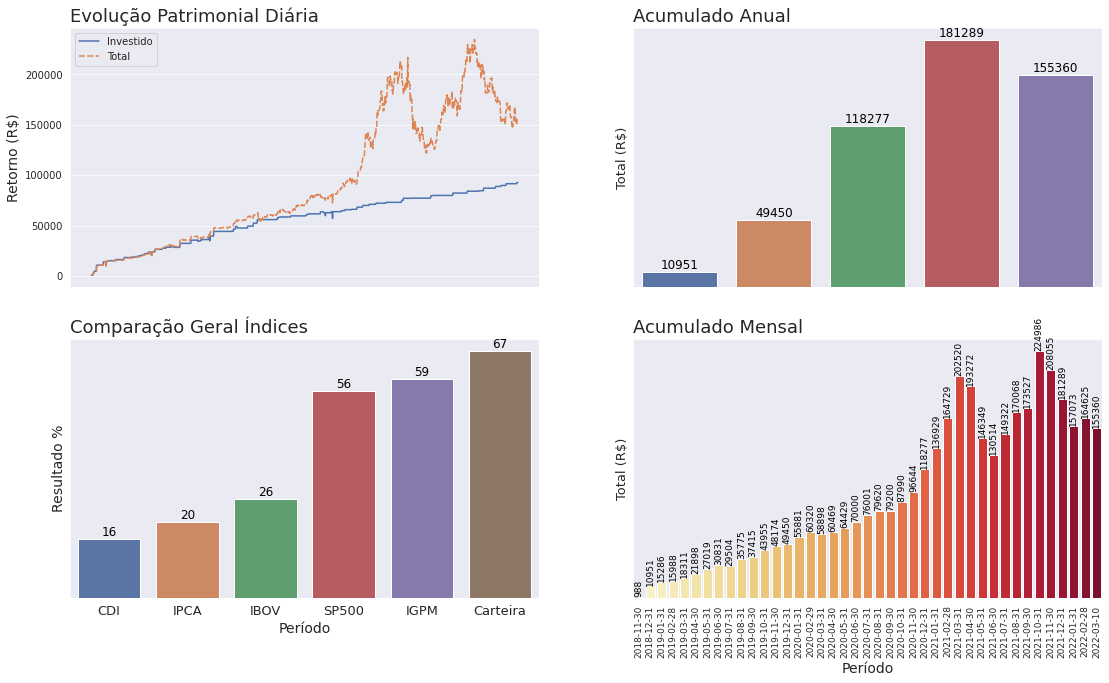

In [ ]:
sns.set_style('darkgrid')
degrees = 90  # Adjust according to one's preferences/needs

area1 = plt.figure()
area1.set_size_inches(18.5, 10.5)

a1 = area1.add_subplot(2,2,1)
a1.set_title('Evolução Patrimonial Diária', loc='left', fontsize=18)
a1.set_ylabel('Retorno (R$)', fontsize=14)
plt.xticks([])
sns.lineplot(data=compilacao.loc[:, 'Investido':'Total'], palette='deep')

a2 = area1.add_subplot(2,2,2)
sns.set_palette("husl", 15)
sns.set_style('darkgrid')
a2.set_title('Acumulado Anual', loc='left', fontsize=18)
a2.tick_params(labelsize=13)
sns.barplot(x=carteira_consolidada_ano.index, y='Total_acc', data=carteira_consolidada_ano, palette='deep')
a2.set_ylabel('Total (R$)', fontsize=13)
for p in a2.patches:
    a2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.xticks([])
plt.yticks([])

a3 = area1.add_subplot(2,2,3)
sns.set_palette("husl", 15)
sns.set_style('darkgrid')
a3.set_title('Comparação Geral Índices', loc='left', fontsize=18)
a3.set_xlabel('Período', fontsize=14)
plt.yticks([])
a3.set_ylabel('Total (%)', fontsize=14)
a3.tick_params(labelsize=13)
sns.barplot(x=indices_acumulados_hoje.index, y=indices_acumulados_hoje['Resultado %'], data=indices_acumulados_hoje, palette='deep')
for p in a3.patches:
    a3.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

a4 = area1.add_subplot(2,2,4)
sns.set_palette("husl", 15)
sns.set_style('darkgrid')
a4.set_title('Acumulado Mensal', loc='left', fontsize=18)
a4.set_xlabel('Período', fontsize=14)
plt.yticks([])
a4.tick_params(labelsize=9)
plt.xticks(rotation=degrees)
sns.barplot(x=carteira_consolidada_mes.index, y='Total_acc', data=carteira_consolidada_mes, palette='YlOrRd')
a4.set_ylabel('Total (R$)', fontsize=13)
for p in a4.patches:
    a4.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=9, color='black', ha='center', va='bottom',rotation=degrees)

In [ ]:
plt.show()
print("")
print("Análise Finalizada")
print("")


Análise Finalizada

